<a href="https://colab.research.google.com/github/tianygoulart/Machine-Leaning/blob/main/SistemaderecomendacaoMLmodulo3cap2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#aula 2.4 distancia euclidiana 


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.spatial.distance import pdist, hamming, cosine


In [5]:
def euclidean_distance(x: np.array, y: np.array):
  distance = np.sqrt(np.sum((x-y)**2))

  return distance

In [6]:
x = np.array([1, 2])
y = np.array([5,5])

In [7]:
d= euclidean_distance(x,y)
print(f"A distancia euclidiana entre x e y é {d}.")

A distancia euclidiana entre x e y é 5.0.


In [8]:
np.linalg.norm?

In [9]:
np.linalg.norm(x-y)

5.0

In [ ]:
#aula 2.5 distancia de hamming


In [17]:
def hamming_distance(x: np.array, y: np.array, normalize: bool = False):
   factor = 1. if not normalize else 1/len(x)
   distance = factor * np.sum(np.abs(x-y))

   return distance 


In [18]:
x = np.array([1,0,0,1,1,0])
y = np.array([1,1,0,0,0,0])

In [19]:
h = hamming_distance(x,y)
print(f"A distancia de Hamming entre x e y é {h}")

A distancia de Hamming entre x e y é 3.0


In [21]:
h = hamming_distance(x,y, normalize=True)
print(f"A distancia de Hamming normalizada entre x e y é {h}.")


A distancia de Hamming normalizada entre x e y é 0.5.


In [22]:
hamming?

In [23]:
hamming(x,y)

0.5

In [24]:
# aula 2.6 produto interno e similaridade por cosseno
x=np.array([1,0,0,1,1,1]).reshape(-1,1)
y=np.array([1,1,0,0,1,0]).reshape(-1,1)


In [25]:
print("x:\n",x)
print("y:\n",y)

x:
 [[1]
 [0]
 [0]
 [1]
 [1]
 [1]]
y:
 [[1]
 [1]
 [0]
 [0]
 [1]
 [0]]


In [26]:
x.T @ y

array([[2]])

In [27]:
np.sum(x*y)

2

In [28]:
np.dot?

In [29]:
np.dot(x.ravel(), y.ravel())

2

In [31]:
def cosine_similarity(x: np.array, y: np.array):
  cosine_sim = np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))

  return cosine_sim

In [32]:
c = cosine_similarity(x.ravel(), y.ravel())
print(f"A similaridade de cossenos entre x e y é {c}.")

A similaridade de cossenos entre x e y é 0.5773502691896258.


In [33]:
cosine?

In [34]:
1- cosine(x.ravel(), y.ravel())

0.5773502691896257

In [35]:
# aula 2.7 Distancia euclidiana vs similaridade por cossenos 
!pip install wikipedia


  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=525128e24fc1fa308adb4af31a5f57a6c5c72b56537fdc18f175583f8aa0be61
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [36]:
import wikipedia

In [37]:
wikipedia.set_lang("pt")

In [38]:
query_1 = wikipedia.page("Inteligencia Artificail")
query_2 = wikipedia.page("Futebol")
query_3 = wikipedia.page("Aprendizado de máquinas")
query_4 = wikipedia.page("Voleibol")

In [39]:
query_1.title

'Inteligência artificial'

In [40]:
query_1.url

'https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial'

In [41]:
query_1.content

'Inteligência artificial (por vezes mencionada pela sigla em português IA ou pela sigla em inglês AI - artificial intelligence) é a inteligência similar à humana exibida por sistemas de software, além de também ser um campo de estudo acadêmico. Os principais pesquisadores e livros didáticos definem o campo como "o estudo e projeto de agentes inteligentes", onde um agente inteligente é um sistema que percebe seu ambiente e toma atitudes que maximizam suas chances de sucesso. Andreas Kaplan e Michael Haenlein definem a inteligência artificial como “uma capacidade do sistema para interpretar corretamente dados externos, aprender a partir desses dados e utilizar essas aprendizagens para atingir objetivos e tarefas específicas através de adaptação flexível”. John McCarthy, quem cunhou o termo em 1956 ("numa conferência de especialistas celebrada em Darmouth Colege" Gubern, Román: O Eros Eletrónico), a define como "a ciência e engenharia de produzir sistemas inteligentes". É uma área de pesq

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = np.array(cv.fit_transform([query_1.content,
                               query_2.content,
                               query_3.content,
                               query_4.content]).todense())

In [47]:
print("Inteligencia Aritificial", len(query_1.content.split()), "\n"
      "Futebol \t\t", len(query_2.content.split()), "\n"
      "Aprendizado de Máquinas", len(query_3.content.split()), "\n"
      "Voleibol \t\t", len(query_4.content.split()))

Inteligencia Aritificial 11294 
Futebol 		 10658 
Aprendizado de Máquinas 4135 
Voleibol 		 4829


In [46]:
X.shape

(4, 5828)

In [48]:
# distancia euclidiana
print("Inteligencia Artificial - Futebol \t\t\t", euclidean_distance(X[0], X[1]), "\n"
"Inteligencia Aritifical - Aprendizado de Máquinas \t", euclidean_distance(X[0], X[2]), "\n"
"Inteligencia Artificial - Voleibol \t\t\t", euclidean_distance(X[0], X[3]))

Inteligencia Artificial - Futebol 			 482.80845063026806 
Inteligencia Aritifical - Aprendizado de Máquinas 	 619.2479309614204 
Inteligencia Artificial - Voleibol 			 683.3066661463212


In [49]:
# distancia por cossenos 
print("Inteligencia Artificial - Futebol \t\t\t", cosine_similarity(X[0], X[1]), "\n"
"Inteligencia Artifical - Aprendizado de Máquinas \t", cosine_similarity(X[0], X[2]), "\n"
"Inteligencia artificail - Voleibol \t\t\t", cosine_similarity(X[0], X[3]))

Inteligencia Artificial - Futebol 			 0.8664602111921241 
Inteligencia Artifical - Aprendizado de Máquinas 	 0.9137949373656862 
Inteligencia artificail - Voleibol 			 0.8264403441215333


In [50]:
# categotizando um tweet
tweet = "romario e ronaldo são os melhores atacantes que já vi jogar... dentro da pequena área era sempre gol!"
t = np.array(cv.transform([tweet]).todense())[0]

In [53]:
# tweet vs paginas co distancia euclidiana
print("tweet - Inteligencia Artificial \t", euclidean_distance(t, X[0]), "\n"
"tweet - Futebol \t\t\t", euclidean_distance(t, X[1]), "\n"
"tweet - Aprendizado de Máquinas \t", euclidean_distance(t, X[2]), "\n"
"twwet - Voleibol \t\t\t", euclidean_distance(t, X[3]))

tweet - Inteligencia Artificial 	 965.9699788295701 
tweet - Futebol 			 821.038366947611 
tweet - Aprendizado de Máquinas 	 403.92078431296403 
twwet - voleibol 			 384.912977177959


In [55]:
# tweet vc paginas com similaridade por cossenos
print("tweet - Inteligencia Artificial \t", cosine_similarity(t, X[0]), "\n"
"tweet - Futebol \t\t\t", cosine_similarity(t, X[1]), "\n"
"tweet - Aprendizado de Máquinas \t", cosine_similarity(t, X[2]), "\n"
"twwet - Voleibol \t\t\t", cosine_similarity(t, X[3]))

tweet - Inteligencia Artificial 	 0.15440210339760962 
tweet - Futebol 			 0.1828706859565224 
tweet - Aprendizado de Máquinas 	 0.11430235112545817 
twwet - Voleibol 			 0.17611644436368035


In [58]:
# aula 2.8 O mal da dimensionalidade
n = 1000
user_a = np.ones(n)
user_b = np.zeros(n)
euclidean_distance = np.sqrt(np.cumsum((user_a - user_b)**2))

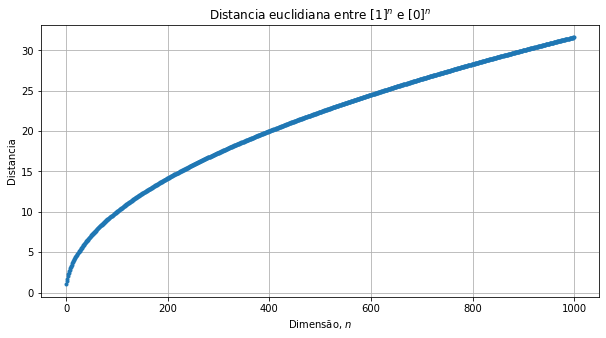

In [60]:
plt.figure(figsize=(10,5))
plt.plot(euclidean_distance, '.', label='Distancia euclidiana')
plt.xlabel("Dimensão, $n$")
plt.ylabel("Distancia")
plt.title('Distancia euclidiana entre $[1]^n$ e $[0]^n$')
plt.grid()
plt.show()

In [67]:
def distance_distribution(number_points = 5000, distance_type='euclidean'):
  n_range = [2,8,16,32,64,256,512,1024]
  plt.figure(figsize=(20,10))
  for i, n in enumerate(n_range):
    points = np.random.uniform(size=(number_points, n))
    pairwise_distance = pdist(points, metric=distance_type)
    max_distance = np.max(pairwise_distance)
    distribution = pairwise_distance/max_distance
    xlabel_text = "Euclidean distance/Max distance"
    std = np.std(distribution)
    plt.subplot(2,4, i+1)
    plt.subplots_adjust(hspace=.3)
    plt.hist(distribution, density=True)
    plt.title(f'Dimension {n}, $\sigma$ = {std:.3f}')
    plt.xlabel(xlabel_text)
    plt.xticks(np.linspace(0,1,5))
  
  plt.show()




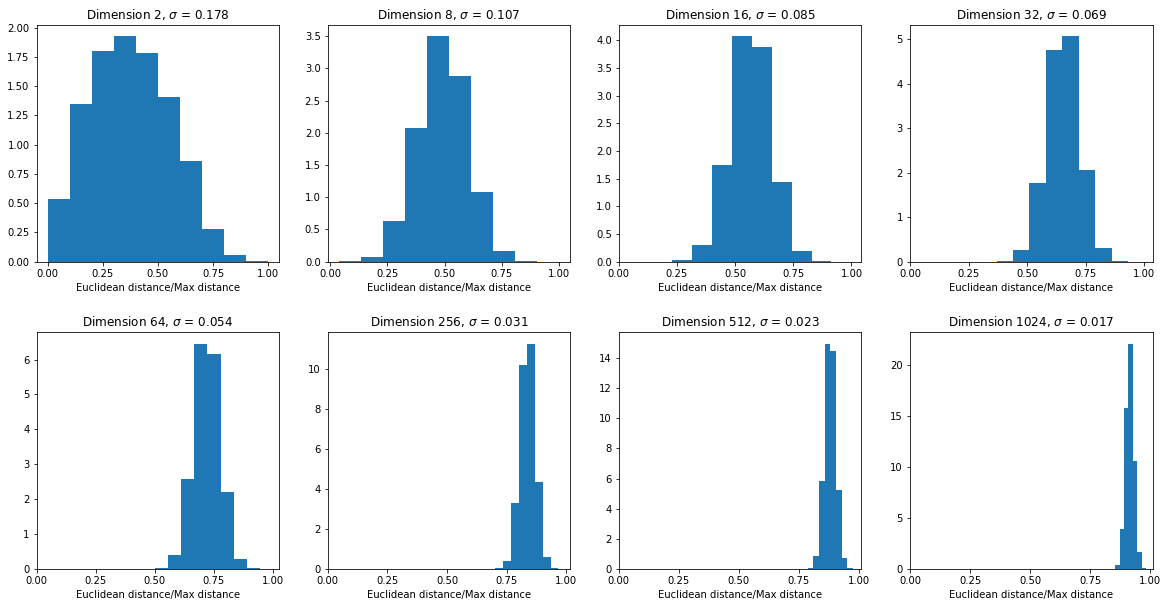

In [68]:
distance_distribution()